In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %config InlineBackend.close_figures=False # keep figures open in pyplot

In [6]:
numval = 6
numseed = 5
psnr_dae = np.random.rand(numval, numseed) + 18 # ind 0: latent dim, ind 1: seed
psnr_jae = np.random.rand(numval, numseed) + 21
psnr_ndpca = np.random.rand(numval, numseed) + 19
Z = np.arange(numval) + 10
Z1 = np.zeros((numval, numseed))
Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
    for j in range(numseed):
        Z1[i, j] = int(Z[i] / 2)
        Z2[i, j] = Z[i] - Z1[i, j]
        # print(Z[i], Z1[i, j], Z2[i, j])

In [7]:
### load cifar csv
# cifar_df = pd.read_csv("./denoising_cifar.csv")
# print(cifar_df.head())
### data type
# cifar_df.dtypes

cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_dae)): ### latent dim
    for j in range(len(psnr_dae[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_dae[i, j], 'method': 'DAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_jae[i, j], 'method': 'JAE', 'seed': j}, ignore_index=True)

print(cifar_df.head())
print(cifar_df.tail())

   dpca_dim   Z1   Z2       psnr        method  seed
0        10  5.0  5.0  19.613560  NDPCA (ours)     0
1        10  5.0  5.0  18.623081           DAE     0
2        10  5.0  5.0  21.667534           JAE     0
3        10  5.0  5.0  19.958495  NDPCA (ours)     1
4        10  5.0  5.0  18.432902           DAE     1
    dpca_dim   Z1   Z2       psnr        method  seed
85        15  7.0  8.0  18.006477           DAE     3
86        15  7.0  8.0  21.825145           JAE     3
87        15  7.0  8.0  19.831614  NDPCA (ours)     4
88        15  7.0  8.0  18.337803           DAE     4
89        15  7.0  8.0  21.224484           JAE     4


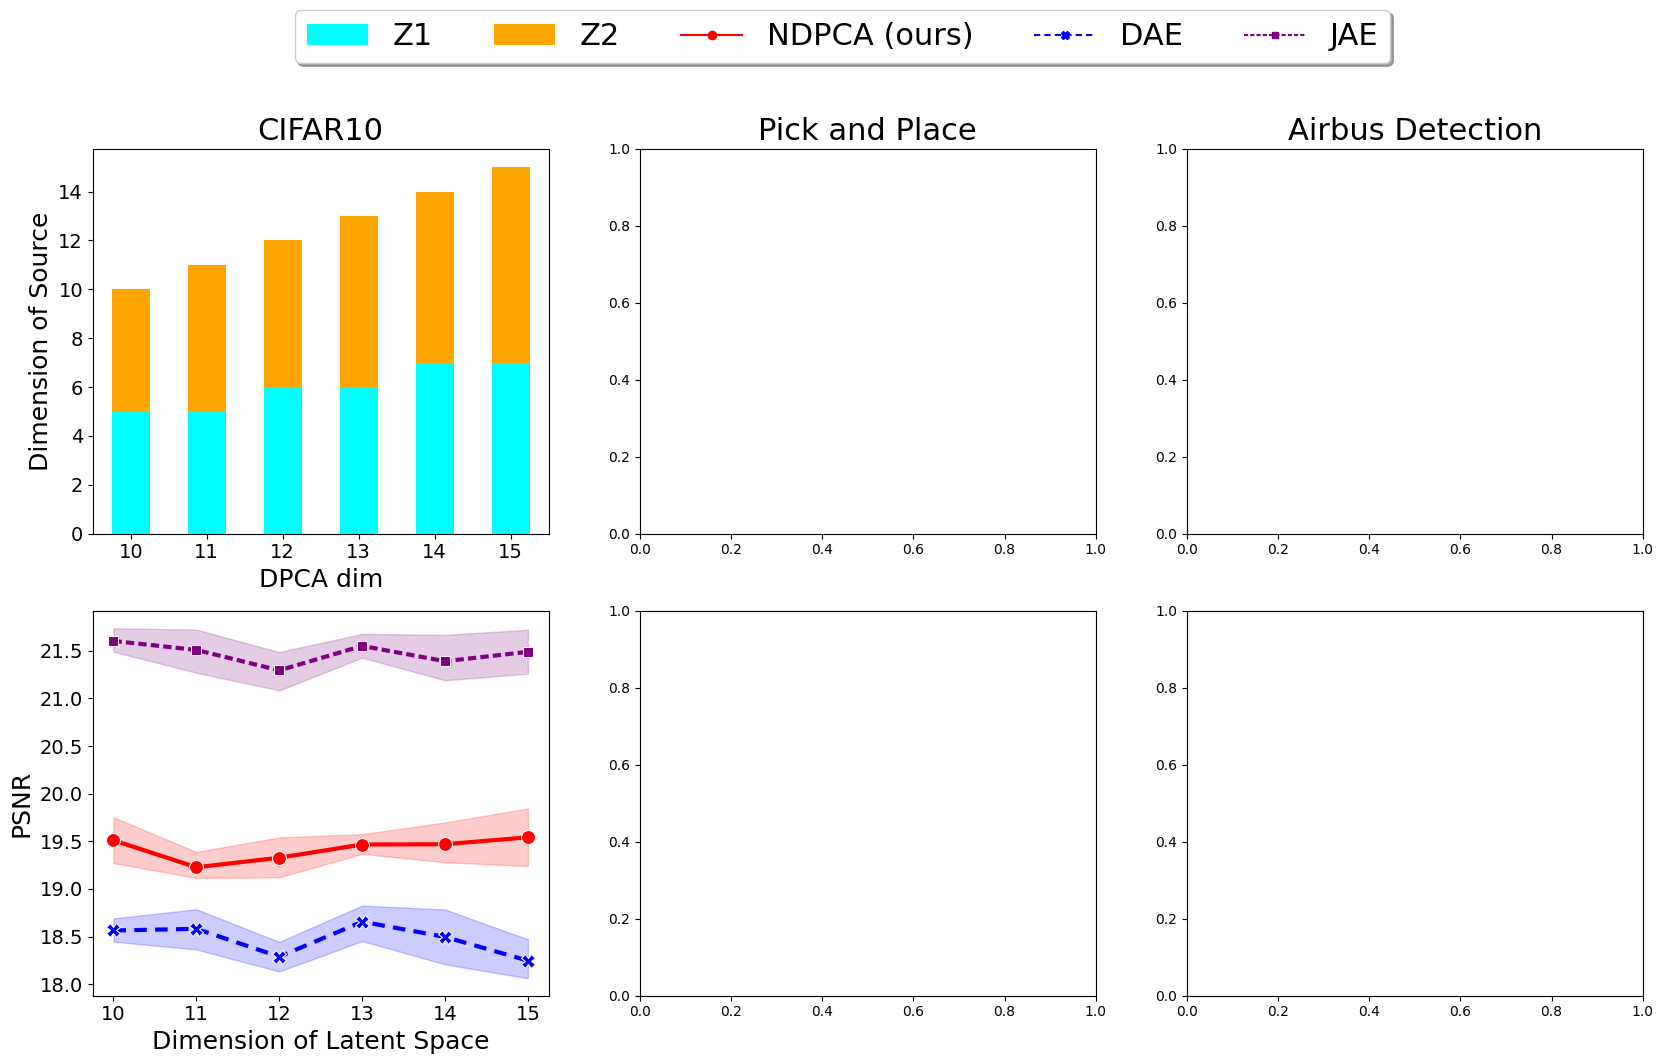

In [8]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_z", "pnp_z", "airbus_z"], 
        ["cifar_dpca", "pnp_dpca", "airbus_dpca"]],
        figsize=(20, 11))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

####### ax #######
# 1 2 3
# 4 5 6
####### ax #######

### set title
ax_list["cifar_z"].set_title("CIFAR10", fontsize=22)
ax_list["pnp_z"].set_title("Pick and Place", fontsize=22)
ax_list["airbus_z"].set_title("Airbus Detection", fontsize=22)


### plot cifar denoising

## plot DPCA curve
ax4 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method',
                    palette=['red', 'blue', 'purple'], dashes=['', (3,2), (2,1)], style="method", markers=True, markersize=10)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=18)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=18)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=14)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=14)
ax_list["cifar_dpca"].legend().remove()

## plot Z1 and Z2
cifar_df_z = cifar_df.loc[(cifar_df["method"]).str.contains('NDPCA') & (cifar_df["seed"] == cifar_df.iloc[0]["seed"]) ]
cifar_df_z.plot(kind='bar', stacked=True, color=['aqua', 'orange'], ax=ax_list["cifar_z"], 
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["cifar_z"].set_xlabel("DPCA dim", fontsize=18)
ax_list["cifar_z"].set_ylabel("Dimension of Source", fontsize=18)
ax_list["cifar_z"].tick_params(axis="x", labelsize=14)
ax_list["cifar_z"].tick_params(axis="y", labelsize=14)
ax_list["cifar_z"].legend().remove()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes ]#[ax_list["cifar_dpca"], ax_list["cifar_z"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), fancybox=True, shadow=True, ncol=6, fontsize=22)
plt.show()